Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


Reading the Data

In [2]:
data =  pd.read_csv('machine_failure.csv')

Checking the Data

In [3]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB


# Encoding the Type Categorical variable

In [6]:
dummies = pd.get_dummies(data['Type'], prefix =  'Type')
dummies.head()

,Type_H,Type_L,Type_M
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [7]:
data = pd.concat([data, dummies], axis=1)
data.drop('Type', inplace =  True, axis = 1)

### All product ids are unique so dropping the duplicate identifier column

In [8]:
data.drop('Product ID', inplace = True, axis = 1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   Type_H                   10000 non-null  uint8  
 8   Type_L                   10000 non-null  uint8  
 9   Type_M                   10000 non-null  uint8  
dtypes: float64(3), int64(4), uint8(3)
memory usage: 576.3 KB


In [27]:
data.Type_H = data.Type_H.astype(int)
data.Type_L = data.Type_L.astype(int)
data.Type_M = data.Type_M.astype(int)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   Type_H                   10000 non-null  int32  
 8   Type_L                   10000 non-null  int32  
 9   Type_M                   10000 non-null  int32  
dtypes: float64(3), int32(3), int64(4)
memory usage: 664.2 KB


In [29]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.100300,0.600000,0.299700
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.300415,0.489922,0.458149
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,1.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,1.000000,1.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000


Lets check the distribution of categorical variables

In [39]:
data[['Machine failure']].value_counts()

Machine failure
0                  9661
1                   339
dtype: int64

In [23]:
percentage = data[data['Machine failure'] == 1].shape[0] / data.shape[0]
print(percentage)

0.0339


We will verify our hypothesis by evaluating our models.

#### Preparing the data for model evaluation

Lets check the correlation for the variables

<AxesSubplot:>

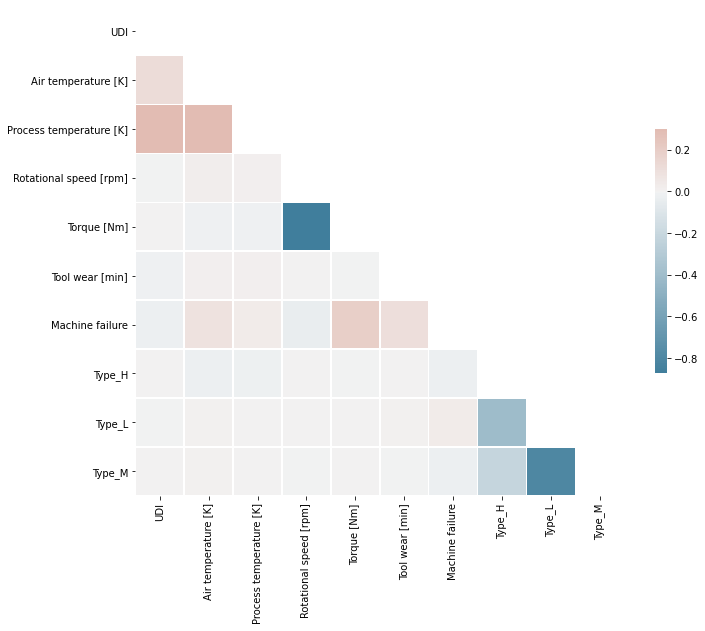

In [57]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
y = data['Machine failure']
X = data.drop('Machine failure', axis = 1)
print(X.shape)
print(y.shape)

(10000, 9)
(10000,)


In [19]:
logreg = LogisticRegression(random_state=0, max_iter=1000)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

# predict probabilities
pred_train = logreg.predict_proba(X_train)
pred_test = logreg.predict_proba(X_test)


In [20]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)

In [21]:
pd.DataFrame(y)

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [24]:
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1

In [25]:
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)

In [26]:
pred_train['y']

0       0
1       0
2       0
3       0
4       1
       ..
6995    1
6996    0
6997    1
6998    0
6999    0
Name: y, Length: 7000, dtype: int32

In [27]:
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"logreg": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'logreg': {'Acc_train': 0.8187142857142857, 'Acc_test': 0.831}}

In [28]:
roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

0.8948293144837637

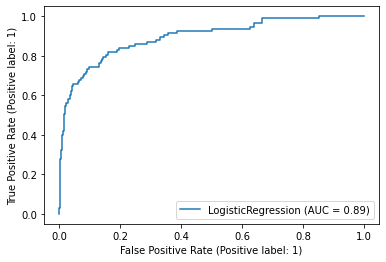

In [33]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(logreg, X_test, y_test)
plt.show()

In [31]:
y_test.value_counts()

0    2907
1      93
Name: Machine failure, dtype: int64

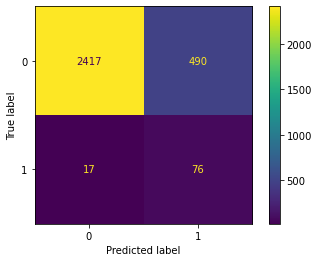

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### ALE

In [37]:
import PyALE
def ale(target=None, print_meanres=False, **kwargs):
    if target is not None:

        class clf:
            def __init__(self, classifier):
                self.classifier = classifier

            def predict(self, X):
                return self.classifier.predict_proba(X)[:, target]

        clf_dummy = clf(kwargs["model"])
        kwargs["model"] = clf_dummy
    if print_meanres & len(kwargs["feature"]) == 1:
        mean_response = np.mean(kwargs["model"].predict(kwargs["X"]), axis=0)
        print(f"Mean response: {mean_response:.5f}")
    return PyALE.ale(**kwargs)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      7000 non-null   int64  
 1   Air temperature [K]      7000 non-null   float64
 2   Process temperature [K]  7000 non-null   float64
 3   Rotational speed [rpm]   7000 non-null   int64  
 4   Torque [Nm]              7000 non-null   float64
 5   Tool wear [min]          7000 non-null   int64  
 6   Type_H                   7000 non-null   uint8  
 7   Type_L                   7000 non-null   uint8  
 8   Type_M                   7000 non-null   uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 403.3 KB


PyALE._ALE_generic:INFO: Continuous feature detected.


Mean response: 0.03515


PyALE._ALE_generic:INFO: Continuous feature detected.


Mean response: 0.03515


PyALE._ALE_generic:INFO: Continuous feature detected.


Mean response: 0.03515


PyALE._ALE_generic:INFO: Continuous feature detected.


Mean response: 0.03515


PyALE._ALE_generic:INFO: Continuous feature detected.


Mean response: 0.03515


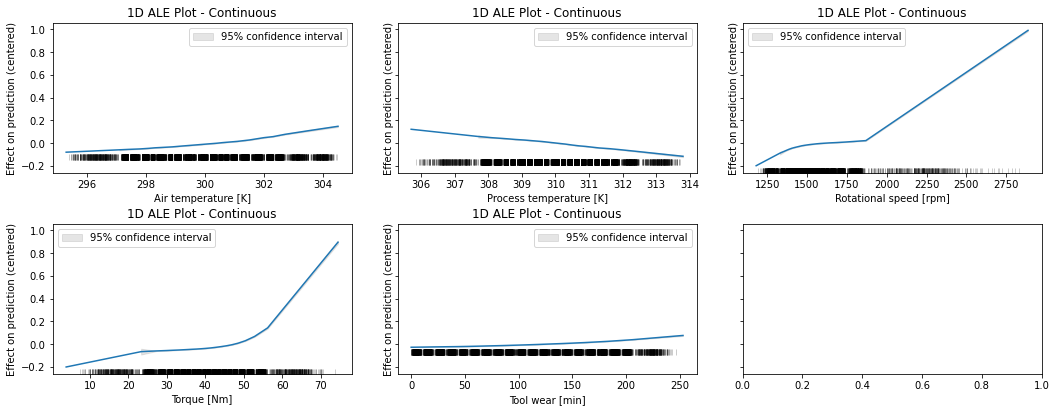

In [41]:
fig, axs = plt.subplots(2, 3, figsize=(15, 6), sharey=True)
fig.tight_layout(pad=3)

air_temperature= ale(
        X=X_train,
        model=logreg,
        feature=["Air temperature [K]"],
        include_CI=True,
        target=1,
        fig=fig,
        ax=axs[0][0],
        print_meanres=True,
    )


process_temperature= ale(
        X=X_train,
        model=logreg,
        feature=["Process temperature [K]"],
        include_CI=True,
        target=1,
        fig=fig,
        ax=axs[0][1],
        print_meanres=True,
    )

rotational_speed= ale(
        X=X_train,
        model=logreg,
        feature=["Rotational speed [rpm]"],
        include_CI=True,
        target=1,
        fig=fig,
        ax=axs[0][2],
        print_meanres=True,
    )

torque= ale(
        X=X_train,
        model=logreg,
        feature=["Torque [Nm]"],
        include_CI=True,
        target=1,
        fig=fig,
        ax=axs[1][0],
        print_meanres=True,
    )

tool_wear= ale(
        X=X_train,
        model=logreg,
        feature=["Tool wear [min]"],
        include_CI=True,
        target=1,
        fig=fig,
        ax=axs[1][1],
        print_meanres=True,
    )

plt.show()

### ICE

In [42]:
from sklearn.inspection import PartialDependenceDisplay

C:\Users\VRAJAG~1\AppData\Local\Temp/ipykernel_26312/2698268049.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig1.tight_layout(pad=2.0)
C:\Users\VRAJAG~1\AppData\Local\Temp/ipykernel_26312/2698268049.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig2.tight_layout(pad=2.0)
C:\tools\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


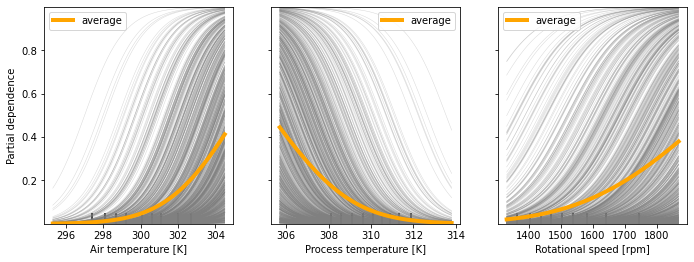

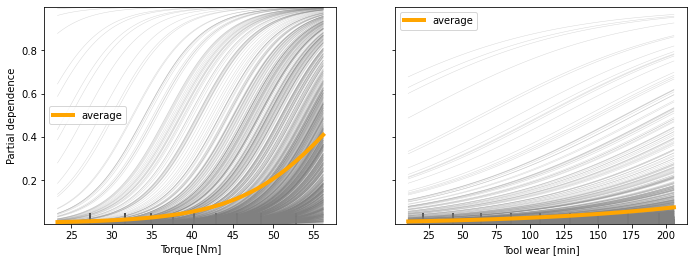

In [46]:
fig1, ax1 = plt.subplots(figsize=(10, 4))
fig2, ax2 = plt.subplots(figsize=(10, 4))
PartialDependenceDisplay.from_estimator(
        estimator=logreg,
        X=X_train,
        features=[1, 2, 3],
        target=1,
        kind="both",
        ice_lines_kw={"color": "#808080", "alpha": 0.3, "linewidth": 0.5},
        pd_line_kw={"color": "#ffa500", "linewidth": 4, "alpha": 1},
        # centered=True, # will be added in the future
        ax=ax1,
    )
fig1.tight_layout(pad=2.0)

PartialDependenceDisplay.from_estimator(
        estimator=logreg,
        X=X_train,
        features=[4, 5],
        target=1,
        kind="both",
        ice_lines_kw={"color": "#808080", "alpha": 0.3, "linewidth": 0.5},
        pd_line_kw={"color": "#ffa500", "linewidth": 4, "alpha": 1},
        # centered=True, # will be added in the future
        ax=ax2,
    )
fig2.tight_layout(pad=2.0)

plt.show()

### PDP

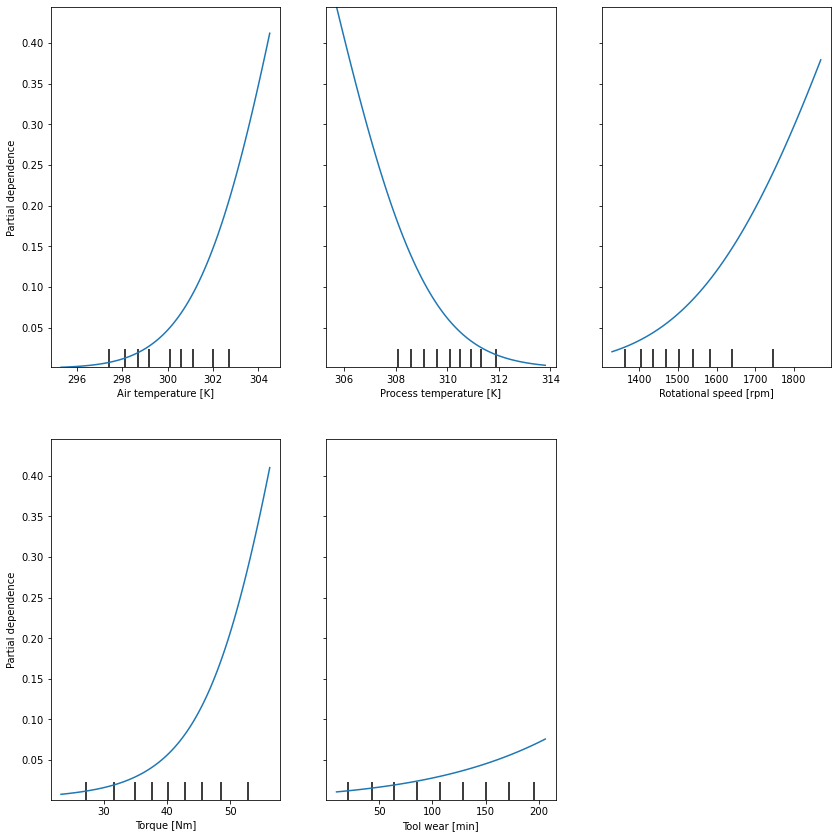

In [49]:
fig1, ax1 = plt.subplots(figsize=(12, 12))
PartialDependenceDisplay.from_estimator(
        estimator=logreg,
        X=X_train,
        features=[1, 2, 3, 4, 5],
        target=1,
        ax=ax1,
    )
fig1.tight_layout(pad=2.0)

### We will now do Feature Selection to verify our obeservations

Shapley

X does not have valid feature names, but LogisticRegression was fitted with feature names
shap:WARNING: Using 7000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/7000 [00:00<?, ?it/s]X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
  0%|          | 1/7000 [00:32<63:20:24, 32.58s/it]X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
  0%|          | 2/7000 [01:00<58:22:10, 30.03s/it]X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
  0%|          | 3/7000 [01:36<63:23:52, 32.62s

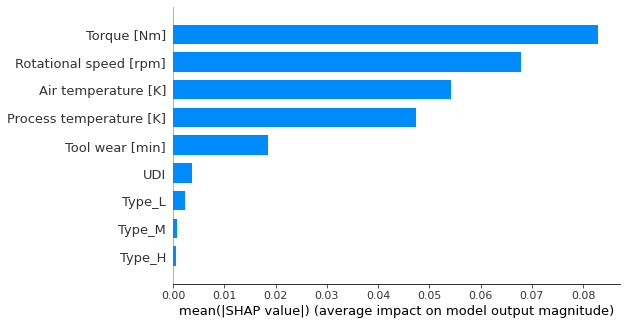

In [52]:
explainer = shap.KernelExplainer(logreg.predict, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Selecting top 5 features from the shapley values

In [66]:
selected_features = ["Air temperature [K]", "Process temperature [K]" , "Rotational speed [rpm]", "Torque [Nm]",  "Tool wear [min]" ]

In [67]:
y = data['Machine failure']
X = data[selected_features]
print(X.shape)
print(y.shape)

(10000, 5)
(10000,)


In [68]:
logreg = LogisticRegression(random_state=0, max_iter=1000)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

# predict probabilities
pred_train = logreg.predict_proba(X_train)
pred_test = logreg.predict_proba(X_test)

In [69]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)

In [70]:
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"logreg": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'logreg': {'Acc_train': 0.8152857142857143, 'Acc_test': 0.835}}

In [71]:
roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

0.8916075768168049

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.


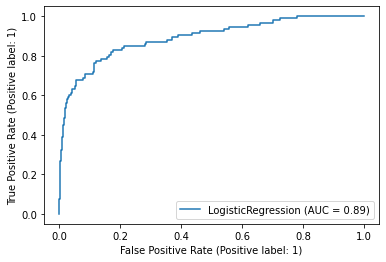

In [72]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(logreg, X_test, y_test)
plt.show()

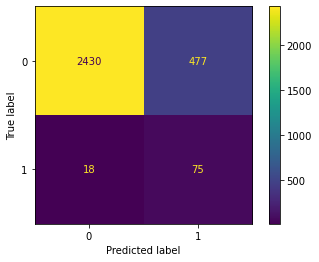

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()